In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.img_tiles as cimgt

In [2]:
df = pd.read_pickle('berlinmod/cseteny.pkl')

In [3]:
df.shape

(455, 3)

In [4]:
df.head(10)

longitude  latitude  trip
Moid time                                              
2    2007-05-27 00:00:00.000    17.9991   47.3166     1
     2007-05-28 15:54:57.735    17.9991   47.3166     1
     2007-05-29 15:02:15.541    17.9991   47.3166     1
3    2007-05-27 00:00:00.000    17.9991   47.3166     2
     2007-05-29 21:11:01.801    17.9991   47.3166     2
4    2007-05-27 00:00:00.000    17.9888   47.3159     3
     2007-05-29 07:42:53.416    17.9888   47.3159     3
     2007-05-29 21:18:33.367    17.9888   47.3159     4
     2007-05-29 21:18:33.368    17.9896   47.3195     5
5    2007-05-27 00:00:00.000    17.9991   47.3166     6

In [5]:
df.index.unique(0).shape

(109,)

In [6]:
df['trip'].unique().shape

(269,)

In [7]:
df['latitude'].describe()

count    455.000000
mean      47.315376
std        0.004552
min       47.303900
25%       47.311800
50%       47.315900
75%       47.317600
max       47.325400
Name: latitude, dtype: float64

In [8]:
df['longitude'].describe()

count    455.000000
mean      17.993850
std        0.009723
min       17.956100
25%       17.988800
50%       17.994200
75%       17.999100
max       18.020900
Name: longitude, dtype: float64

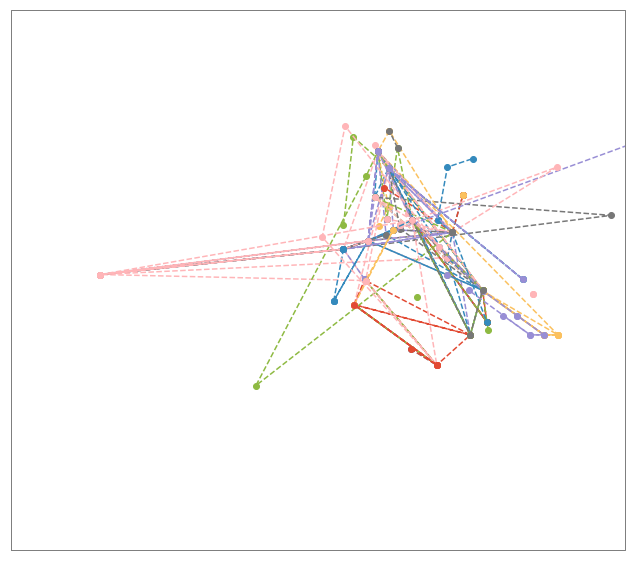

In [9]:
plt.figure(figsize = (11, 11))
    
img = cimgt.GoogleTiles()

ax = plt.axes(projection = img.crs)
#ax.set_extent((9.8457000, 9.8852000, 53.2732000, 53.29710005))
#ax.set_extent((17.9836000, 18.0123000, 47.3096000, 47.3265000))
#ax.set_extent((df['longitude'].min(), df['longitude'].max(), df['latitude'].min(), df['latitude'].max()))
#ax.set_extent((17.956100, 18.002500, 47.313100, 47.319200))
ax.set_extent((17.945147, 18.0201297, 47.2902535, 47.334994))
    
#ax.add_image(img, 12, interpolation = 'bicubic')

for moid in df.index.levels[0]:
    lats = df.loc[moid]['latitude']
    lons = df.loc[moid]['longitude']
    plt.plot(lons, lats, 'o--', transform=ccrs.PlateCarree())